<a href="https://colab.research.google.com/github/ChenyuSonggg/Ditchley-Dataset/blob/main/Ditchley%20Coding%20Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contact Volume

/tmp/ipython-input-2-3017007232.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, y="Organisation", x="ContactCount", palette="Blues_d")


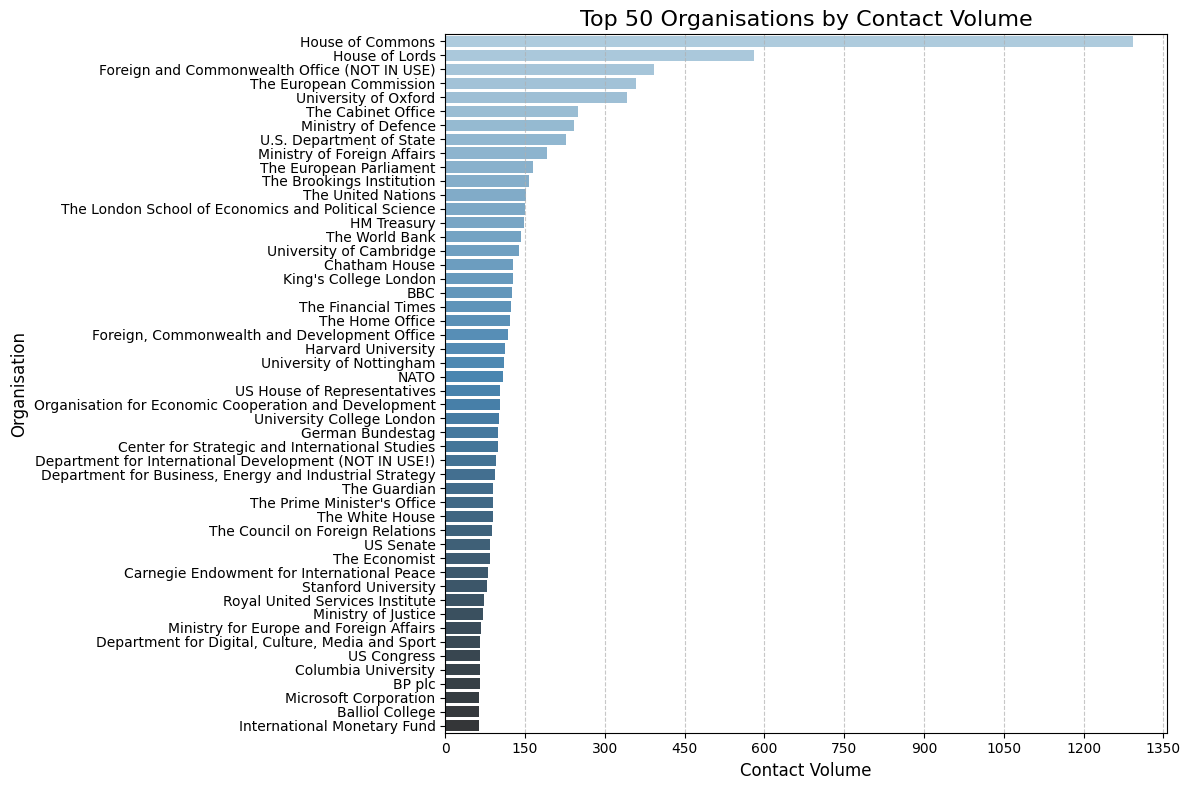

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df = pd.read_csv("contact volume.csv")

df = df.sort_values(by="ContactCount", ascending=False)

plt.figure(figsize=(12, 8))

barplot = sns.barplot(data=df, y="Organisation", x="ContactCount", palette="Blues_d")

plt.title("Top 50 Organisations by Contact Volume", fontsize=16)
plt.xlabel("Contact Volume", fontsize=12)
plt.ylabel("Organisation", fontsize=12)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
barplot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-4-4066386299.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, y="Organisation", x="ThemeCount", palette="viridis")


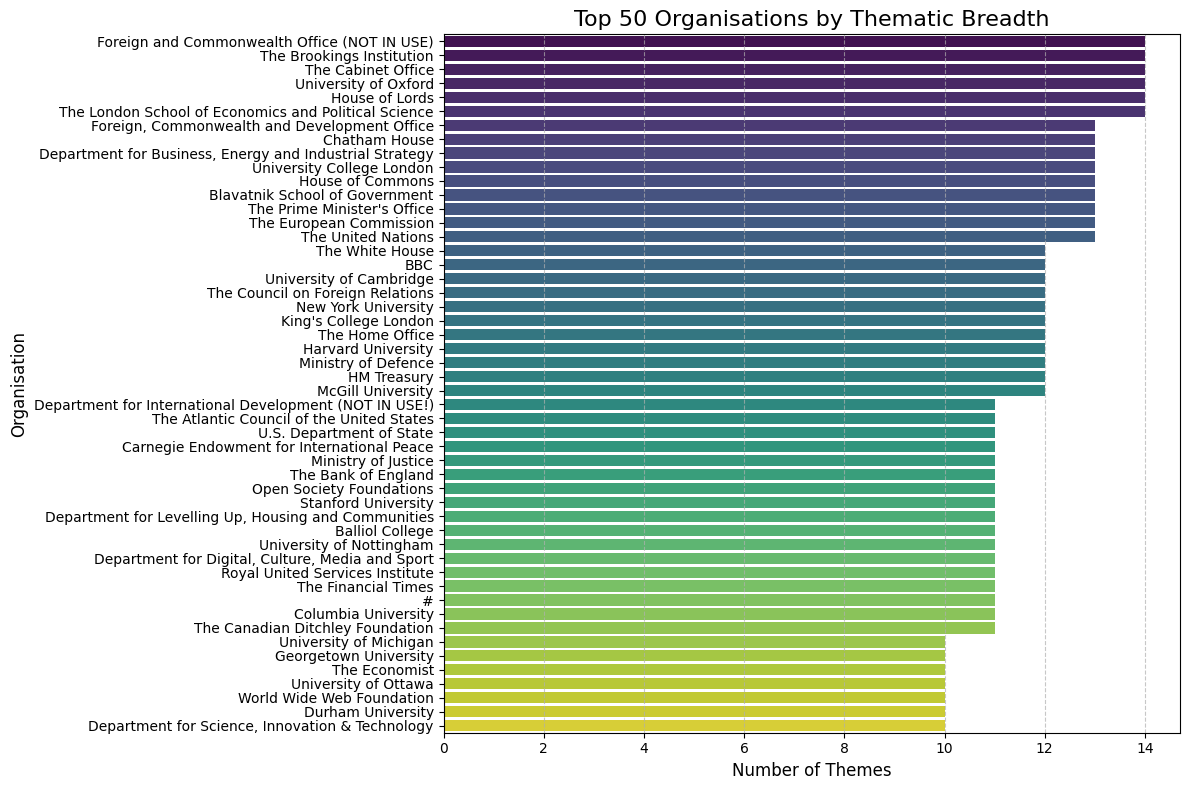

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load CSV
df = pd.read_csv("Thematic Breadth.csv")  # Replace with your actual file name

# Sort by Theme Count
df = df.sort_values(by="ThemeCount", ascending=False)

# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df, y="Organisation", x="ThemeCount", palette="viridis")

# Labels & Titles
plt.title("Top 50 Organisations by Thematic Breadth", fontsize=16)
plt.xlabel("Number of Themes", fontsize=12)
plt.ylabel("Organisation", fontsize=12)

# Tidy up
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
barplot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Organisation X Theme

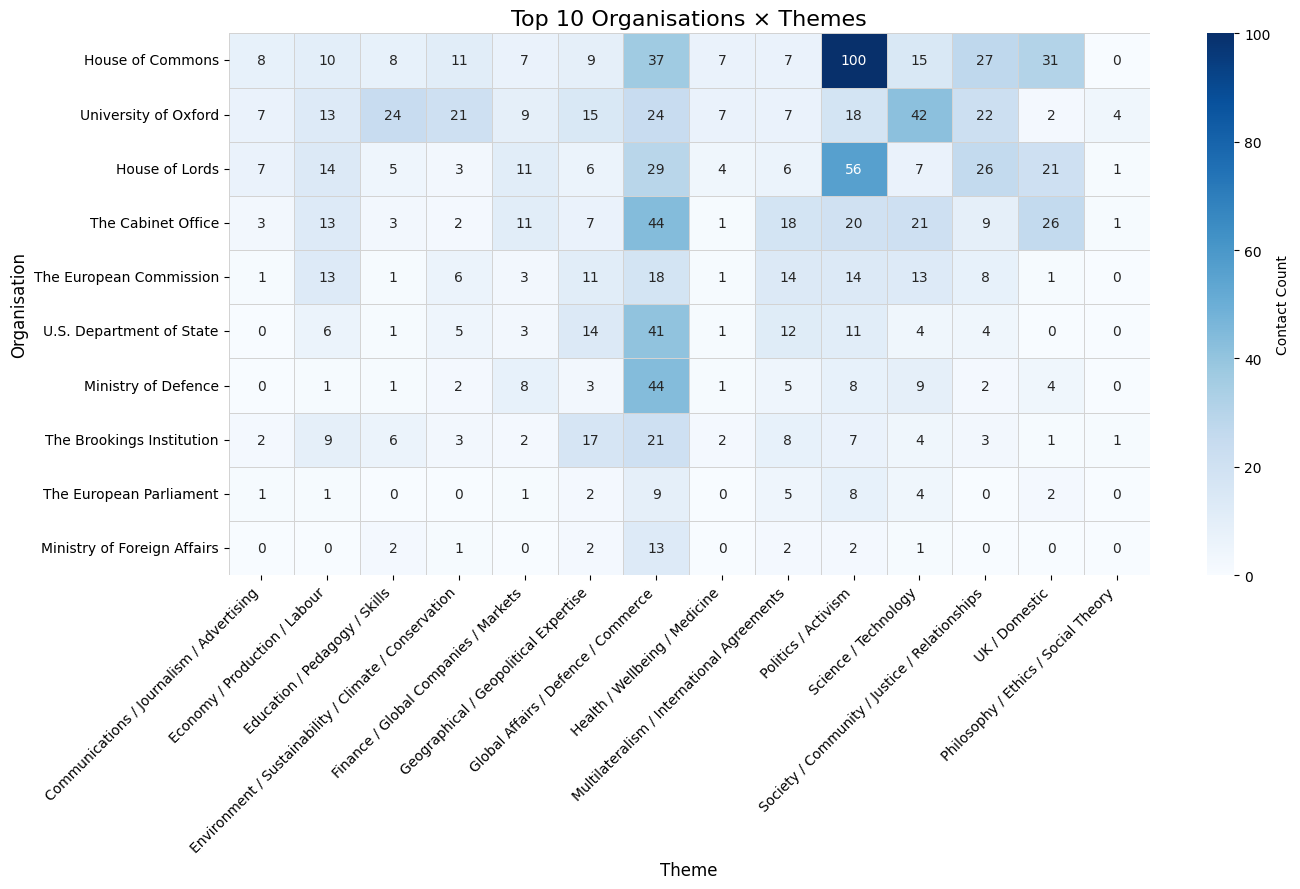

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read the csv
df = pd.read_csv("theme.csv")

# delete “The Ditchley Foundation”
df = df[df['Organisation'] != "The Ditchley Foundation"]

# The order of Theme
theme_order = df['Theme'].drop_duplicates().tolist()
org_order = df.groupby("Organisation")['ContactCount'].sum().sort_values(ascending=False).index.tolist()

pivot = df.pivot_table(index="Organisation", columns="Theme", values="ContactCount", fill_value=0)
pivot = pivot.reindex(index=org_order, columns=theme_order)

# Mapping
plt.figure(figsize=(14, 9))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    linewidths= 0.5,
    linecolor='lightgrey',
    cbar_kws={'label': 'Contact Count'}
)


plt.title("Top 10 Organisations × Themes", fontsize=16)
plt.xlabel("Theme", fontsize=12)
plt.ylabel("Organisation", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Organisations X Subthemes

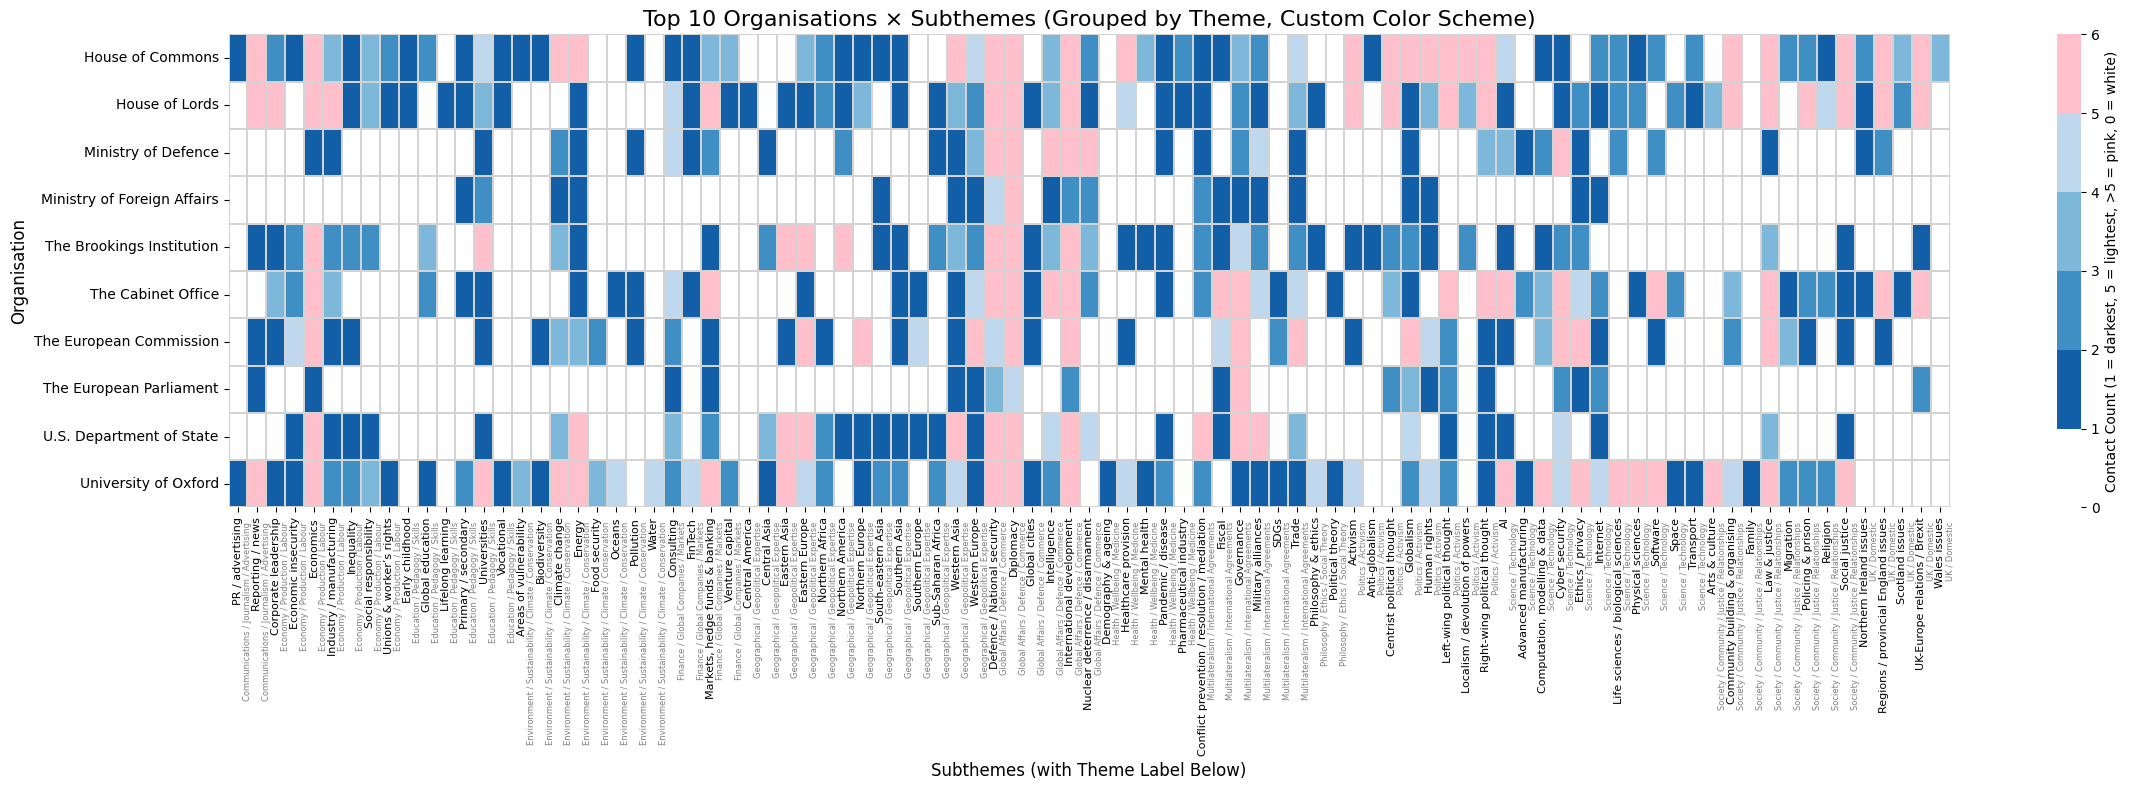

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Read the file
df = pd.read_csv("subtheme.csv")

# Delete "Other (specify)"
df = df[~df['Subtheme'].str.contains("Other", na=False)]

# The order of the subthemes
theme_order = df[['Theme', 'Subtheme']].drop_duplicates().sort_values(by=['Theme', 'Subtheme'])
ordered_subthemes = theme_order['Subtheme'].tolist()

subtheme_to_theme = dict(zip(theme_order['Subtheme'], theme_order['Theme']))

# Org x Theme
heatmap_matrix = df.pivot_table(index="Organisation", columns="Subtheme", values="ContactCount", fill_value=0)

heatmap_matrix = heatmap_matrix[ordered_subthemes]

# White if contacts greater than 7
heatmap_clipped = heatmap_matrix.copy()
heatmap_clipped = heatmap_clipped.clip(upper=6)


# The colors
colors = ["white"] + sns.color_palette("Blues", 10)[::-1] + ["pink"]
cmap = ListedColormap(colors)
bounds = list(range(0, 7))
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(24, 8))
ax = sns.heatmap(
    heatmap_clipped,
    cmap=cmap,
    norm=norm,
    cbar_kws={'label': 'Contact Count (1 = darkest, 5 = lightest, >5 = pink, 0 = white)'},
    linewidths=0.2,
    linecolor='lightgrey',
    annot=False
)


ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
    subtheme = label.get_text()
    theme = subtheme_to_theme.get(subtheme, "")
    ax.text(tick + 0.5, len(heatmap_clipped.index) + 0.3, theme,
            ha='center', va='top', fontsize=6, rotation=90, color='gray')


plt.title("Top 10 Organisations × Subthemes (Grouped by Theme, Custom Color Scheme)", fontsize=16)
plt.xlabel("Subthemes (with Theme Label Below)", fontsize=12)
plt.ylabel("Organisation", fontsize=12)

plt.tight_layout()
plt.show()


In [2]:
!pip uninstall pyvis -y
!pip install pyvis==0.3.1
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Load CSV
df = pd.read_csv('orgcontacts.csv')


df = df[df['Subtheme'] != 'Other (specify)']

G = nx.Graph()
for _, row in df.iterrows():
    org = row['Organisation']
    contact = row['Contact']
    subtheme = row['Subtheme']

    G.add_node(org, label=org, color='blue', shape='ellipse')
    G.add_node(contact, label=contact, color='orange', shape='dot')
    G.add_edge(org, contact, theme=subtheme)


net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='black')
net.from_nx(G)

for edge in net.edges:
    edge['title'] = edge.get('theme', '')

net.show('org_contact_with_subtheme_tooltip.html')

Found existing installation: pyvis 0.3.1
Uninstalling pyvis-0.3.1:
  Successfully uninstalled pyvis-0.3.1
  Using cached pyvis-0.3.1-py3-none-any.whl
